In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as st
%matplotlib inline

In [2]:
a =  np.load("conv1.weight.res56.neg.npy")
print(a.shape)
sss = np.argsort(a[:,1])
print (sss[-10:])

(432, 2)
[232 238 367 427 373 363 412 355 409 229]


In [4]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[0])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)):
    i = a[t][0]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t][1]

In [7]:
c = b.swapaxes(1,3)
c = (c>0.1) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print (TheMap)

[[355. 350. 354. 355. 351.]
 [366. 358. 375. 370. 382.]
 [369. 384. 378. 378. 387.]
 [374. 379. 378. 385. 373.]
 [369. 354. 376. 377. 363.]]


0.4443749999999976 4.981182016782408
(0.4443749999999976, 2.231856181921767)


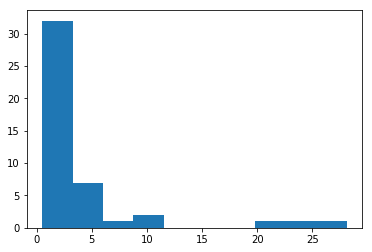

In [4]:
th = 0.5
large = []
for item in a[:,1]:
    if item > th:
        large += [item]
plt.hist(large)
#plt.hist(a[:,1], bins = 100)
print (a[:,1].mean(),a[:,1].var())
print (st.norm.fit(a[:,1]))

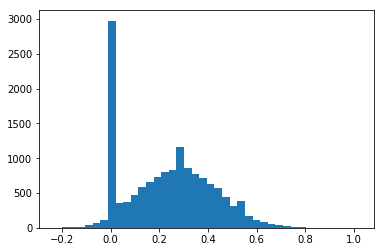

In [6]:
n, bins, patches = plt.hist(a[:,1],40,histtype='bar')
#n, bins, patches = plt.hist(b.reshape(-1),int(len(b.reshape(-1))/300),histtype='bar')

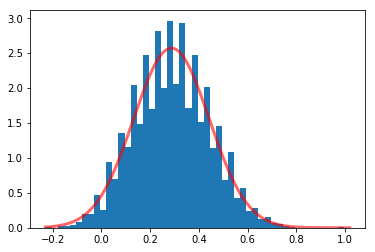

In [13]:
pos = []
for item in a[:,1]:
    if abs(item) > 0.0001:
        pos += [item]
        
fig, ax = plt.subplots(1, 1)
n, bins, patches = ax.hist(pos,50,histtype='bar',density=True)
params = st.norm.fit(pos,bins = 50, density = True)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

# Calculate fitted PDF and error with fit in distribution
x = np.linspace(min(pos),max(pos), 1000)
pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)

ax.plot(x,pdf,
        'r-', lw=3, alpha=0.6, label='norm pdf')

In [15]:
fig = plt.gcf()
fig.savefig('CIFAR_10')

<Figure size 432x288 with 0 Axes>

In [11]:
import warnings
import scipy.stats as st
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    bad = 0
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            print distribution
            pass

            
    print (float(bad)/float(len(DISTRIBUTIONS)))

    return (best_distribution.name, best_params)

#fig, ax = plt.subplots(1,1)
non_zero = []
for item in a[:,1:]:
    if item > 0.0001:
        non_zero +=[item]
best_fit_distribution(a[:,1], bins=100, ax=None)

0.0


('johnsonsu',
 (-0.785132020544973,
  0.9569570574343824,
  -0.009151427748098843,
  0.029107453040637526))

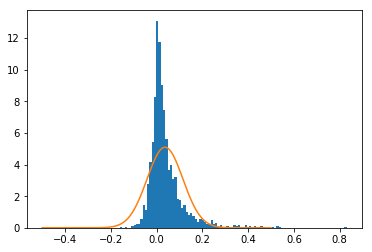

In [14]:
dis = st.norm
params =  dis.fit(a[:,1])
#print params
arg = params[:-2]
loc = params[-2]
scale = params[-1]
x = np.linspace(-0.5,0.5, 1000)
n, bins, patches = plt.hist(a[:,1],bins=100, density = True)
plt.plot(x, dis.pdf(x,loc = loc,scale = scale,*arg))